In [9]:
#import pandas and os library in Jupyter Notebook environment:
import pandas as pd
import numpy as np
import os

In [2]:
dataset1 = pd.read_csv(r"C:\Users\hp\Desktop\New folder\insurance.csv")
dataset1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Shape of our dataset
dataset1.shape

# Info our dataset
dataset1.info()

# Describe our dataset
dataset1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
#Check for missing values
dataset1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in dataset1.columns:
    print('{} : {}'.format(col,dataset1[col].unique()))

age : [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex : ['female' 'male']
bmi : [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.

In [14]:
#replace any null values into np.nan form
for col in dataset1.columns:
   dataset1[col].replace({'?':np.nan},inplace=True)
dataset1.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
dataset1.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]>

<AxesSubplot: >

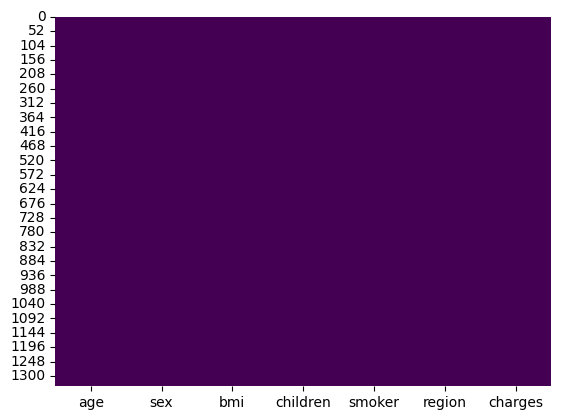

In [17]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

#Visualizing any missing values
sns.heatmap(dataset1.isnull(),cbar=False,cmap='viridis')

C:\Users\hp\AppData\Local\Temp\ipykernel_15304\3220507728.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset1.corr(), cmap="BuPu", annot = True)


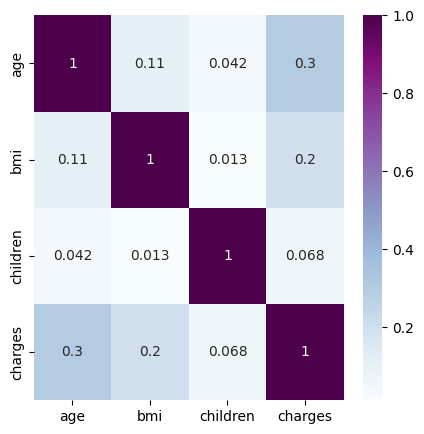

In [21]:
#correlation between different variables
# Visualizing the data using heatmap
plt.figure(figsize=(5,5))
sns.heatmap(dataset1.corr(), cmap="BuPu", annot = True)
plt.show()

Text(0, 0.5, 'smoker')

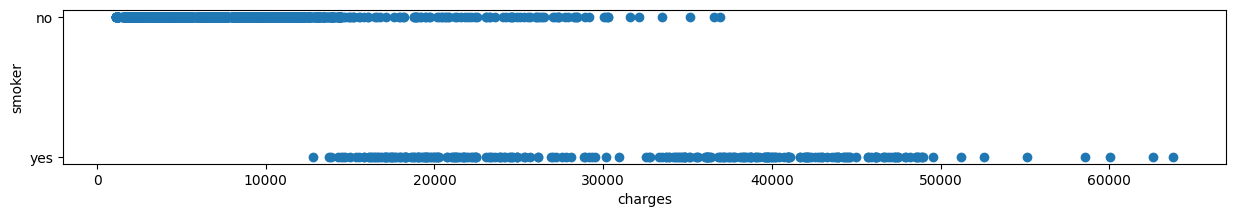

In [41]:
#How does the smoker affect the charges
plt.figure(figsize=(15,2))
plt.scatter(x='charges',y='smoker',data=dataset1)
plt.xlabel('charges')
plt.ylabel('smoker')

<AxesSubplot: xlabel='charges', ylabel='Count'>

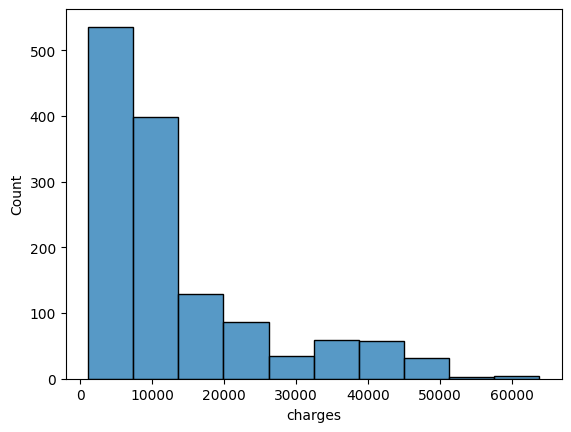

In [32]:
#count the univariate analysis of charges
sns.histplot(dataset1.charges,bins=10)

Text(0, 0.5, 'charges')

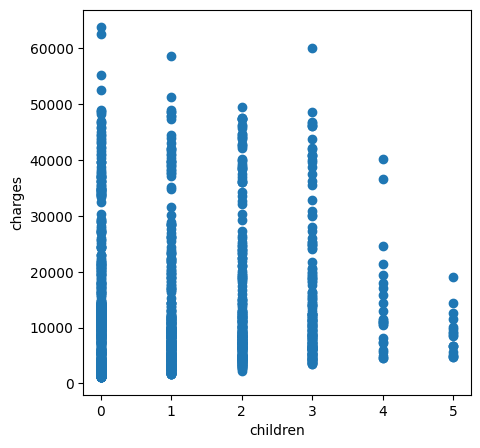

In [36]:
#the relation between children and charges
plt.figure(figsize=(5,5))
plt.scatter(x='children',y='charges',data=dataset1)
plt.xlabel('children')
plt.ylabel('charges')

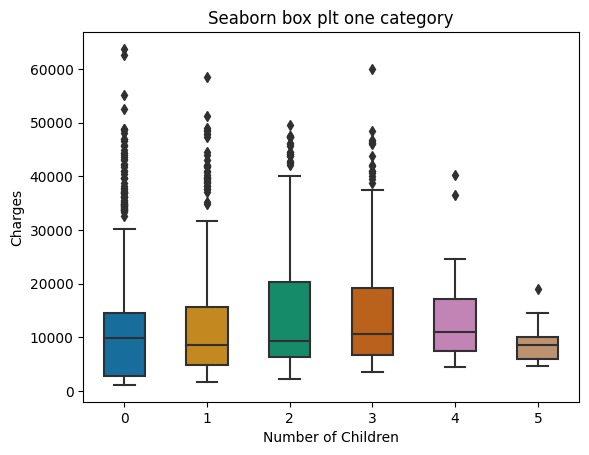

In [45]:
sns.boxplot(y='charges', x='children', 
                 data=dataset1, 
                 width=0.5,
                 palette="colorblind")
plt.title("Seaborn box plt one category")
plt.suptitle("")
plt.xlabel("Number of Children")
plt.ylabel("Charges")
plt.show()